# Generating New Models/Equations Notebook
---

[Author] ERGM & ARL

---

This Notebook aims to show an example of importing generic data into PyFolding and fitting it with a user defined model. Once you have tested it here you can add it to your models.py from the PyFolding installation and setup PyFolding again to incorporate it into your local copy or simply copy it into whichever notebook you are using.

#### So as always lets load up PyFolding:

---

In [1]:
# Load up pyfolding, etc.
%matplotlib inline
import pyfolding
from pyfolding import models

# let's use some other libraries also
import matplotlib.pyplot as plt
import numpy as np

# Command imports pyfolding models
from pyfolding.models import *


<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


---

## NOTE: The cell below just autogenerates a CSV file of data to be imported using the generic importer

---


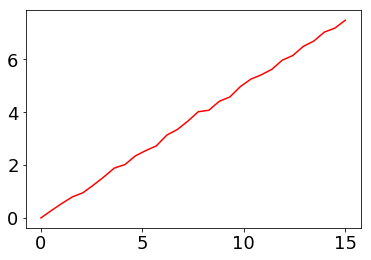

Writing .csv file (../examples/test_data.csv)...


In [2]:
# Lets create some data 

from pyfolding import utils
from collections import OrderedDict
x = np.linspace(0, 15, num=30)
y_straight_line = 0.5*(x) + np.random.randn(len(x))*0.05

plt.figure()
plt.plot(x, y_straight_line,'r-')
plt.show()

data = OrderedDict([('x',x),('Straight_line',y_straight_line)])

utils.write_CSV('../examples/test_data.csv', data)


---

### Loading the Generic Data into PyFolding

---


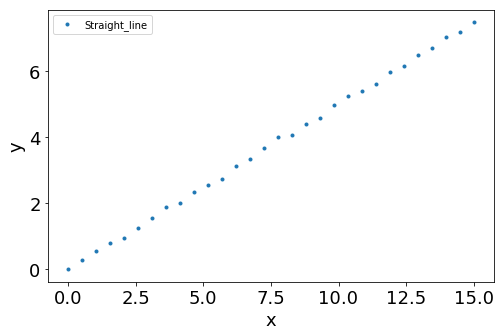

In [3]:
# Lets load this generic data

pth = "../examples/"
test_data = pyfolding.read_generic_data(pth,"test_data.csv")

# Lets plot it to confirm it is functioning correctly in pyFolding
test_data.plot()

In [4]:
#If we want to set our temperature

pyfolding.set_temperature(25.0)

Set temperature to 25.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


---

### In the PyFolding there is a python file that defines all the models that we have inputted into PyFolding called models.py. These have the following format (I have used TwoStateEquilibrium as an example)

---

class TwoStateEquilibrium(core.FitModel):

    """Two state equilibrium denaturation curve - No sloping baseline.

	Folding Scheme:
		N <-> D

	Params:
		F = Fraction unfolded
		m = m-value
		x = denaturant concentration (M)
		d50 = denaturant midpoint (M)
		R = Universal Gas Constant (kcal.mol-1.K-1)
		T = Temperature (Kelvin)

	Reference:
		Clarke and Fersht. Engineered disulfide bonds as probes of
		the folding pathway of barnase: Increasing the stability
		of proteins against the rate of denaturation.
		Biochemistry (1993) vol. 32 (16) pp. 4322-4329"""

    def __init__(self):
		core.FitModel.__init__(self)
		fit_args = self.fit_func_args
		self.params = tuple( [(fit_args[i],i) for i in xrange(len(fit_args))] )
		self.default_params = np.array([1.5, 5.])
		self.verified = True


	def fit_func(self, x, m, d50):
		F = ( np.exp((m*(x-d50))/core.temperature.RT)) / (1.+np.exp((m*(x-d50))/core.temperature.RT))
		return F

	@property
	def equation(self):
		return r'F = \frac{\exp( m(x-d_{50})) / RT} { 1+\exp(m(x-d_{50}))/RT}'
        
---




### The parts that you need to use the make a new equation/model are:

---


class TwoStateEquilibrium(core.FitModel):

    def __init__(self):
		core.FitModel.__init__(self)
		fit_args = self.fit_func_args
		self.params = tuple( [(fit_args[i],i) for i in xrange(len(fit_args))] )
		self.default_params = np.array([1.5, 5.])
		self.verified = True


	def fit_func(self, x, m, d50):
		F = ( np.exp((m*(x-d50))/core.temperature.RT)) / (1.+np.exp((m*(x-d50))/core.temperature.RT))
		return F
        
---

**So lets use these and create our own equation and run it in this notebook (no need to modify the folder models.py) to fit the straight line data we generated above:**

---



In [5]:
# lets give our equation a name
class straightline(core.FitModel):
    
# We don't need to touch any of this next part except "self.default_params"
# "self.default_params" are the initial parameters the model will use so lets change the values in the brackets:
# "np.array([1., 1.])".

    def __init__(self):
        core.FitModel.__init__(self)
        fit_args = self.fit_func_args
        self.params = tuple( [(fit_args[i],i) for i in xrange(len(fit_args))] )
        self.default_params = np.array([1., 1.])

# This is our actual equation we will be using, so lets input a straight line i.e. y = mx+c
    def fit_func(self, x, gradient, intercept):    
        y = (gradient*x)+intercept
        return y

In [6]:
# Lets fit our earlier generated data and see if the model works!

test_data.fit_func = straightline
test_data.fit()

Fitting results
ID: test_data
Model: straightline
Optimiser: pyfolding.GlobalFit and scipy.optimize.curve_fit
Temperature: 25.00°C

(f) gradient     0.50094 ± 0.00014    	 95% CI[   0.50090,    0.50097]
(f) intercept   -0.01329 ± 0.00120    	 95% CI[  -0.01359,   -0.01299]
--------------------------------------------------------------------------------
R^2: 0.99938




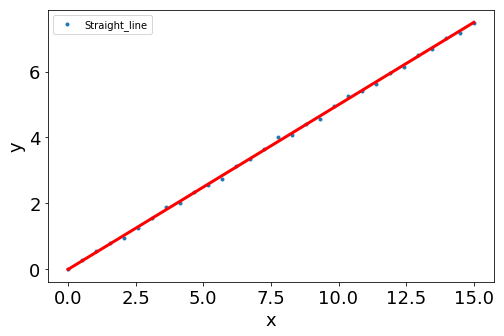

In [10]:
# Now lets plot the data with the fit
test_data.plot()

---

#### NoteBook End

---
